- Juan Esteban Arango
# Actividad 1

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2


df = pd.read_csv('gordos.csv', header=None).astype(int)
df.rename(columns={0: 'numeric_value'}, inplace=True)
print("Sample Data Head:")
print(df.head())
print(f"\nTotal number of observations: {len(df)}")



Sample Data Head:
   numeric_value
0           6040
1           4949
2           2773
3           9171
4           3960

Total number of observations: 2673


# Frecuencia de numeros pares e impares $(\chi^2)$
# Pruebas de frecuencia para uniformidad $(\chi^2)$

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2 # Still useful if you want to show critical values, but chisquare gives p-value directly
from scipy.stats import chisquare # For direct Chi-squared test and p-value



# --- Test 1: Frequency of Even vs. Odd Numbers ---
print("--- Prueba de Frecuencia de Números Pares vs. Impares ---")
print("""
H0: La frecuencia de números pares e impares es la misma (distribución uniforme categórica).
Ha: La frecuencia de números pares e impares no es la misma (no es uniforme categórica).
""")
alpha_even_odd = 0.05 # Significance level

if 'numeric_value' not in df.columns or df.empty:
    print("Error: 'numeric_value' column is missing or DataFrame is empty. Cannot perform test.")
else:
    n_total_even_odd_test = len(df)
    print(f"Número total de observaciones para la prueba par/impar: {n_total_even_odd_test}")

    if n_total_even_odd_test < 2: # Need at least two observations for two categories
        print("No data or insufficient data available to perform the even/odd test (need at least 2 observations).")
    else:
        df['is_even'] = df['numeric_value'] % 2 == 0
        observed_counts_even_odd = df['is_even'].value_counts().sort_index() # False (Impar), True (Par)

        # Ensure both categories are present, fill with 0 if one is missing
        # Observed counts for [Odd (False), Even (True)]
        obs_odd = observed_counts_even_odd.get(False, 0)
        obs_even = observed_counts_even_odd.get(True, 0)
        
        observed_frequencies_even_odd = np.array([obs_odd, obs_even])

        print(f"Frecuencias Observadas (Par/Impar):\n  Números Impares: {obs_odd}\n  Números Pares: {obs_even}")

        # Expected frequencies under H0 (uniform distribution between two categories)
        expected_even = n_total_even_odd_test / 2.0
        expected_odd = n_total_even_odd_test / 2.0
        expected_frequencies_even_odd = np.array([expected_odd, expected_even])
        print(f"Frecuencias Esperadas (Par/Impar):\n  Números Impares: {expected_odd:.2f}\n  Números Pares: {expected_even:.2f}")

        if np.any(expected_frequencies_even_odd < 5):
            print("\nAdvertencia: Alguna frecuencia esperada (par/impar) es menor que 5. La prueba Chi-cuadrado puede no ser precisa.")
        
        if np.any(expected_frequencies_even_odd == 0):
            print("Error: Frecuencia esperada es cero para una o más categorías (par/impar). No se puede realizar la prueba Chi-cuadrado.")
            chi_squared_stat_eo, p_value_eo = np.nan, np.nan
        else:
            # Perform Chi-squared goodness of fit test
            chi_squared_stat_eo, p_value_eo = chisquare(f_obs=observed_frequencies_even_odd, f_exp=expected_frequencies_even_odd)
            print(f"Estadístico Chi-cuadrado calculado (Par/Impar): {chi_squared_stat_eo:.4f}")
            print(f"P-valor (Par/Impar): {p_value_eo:.4f}")

        # Degrees of freedom for k categories is k-1. Here k=2 (even, odd), so df=1.
        degrees_of_freedom_even_odd = len(observed_frequencies_even_odd) - 1
        # Critical value can still be shown for reference
        if degrees_of_freedom_even_odd > 0 :
            critical_value_even_odd = chi2.ppf(1 - alpha_even_odd, degrees_of_freedom_even_odd)
            print(f"Valor crítico de Chi-cuadrado (alpha={alpha_even_odd}, df={degrees_of_freedom_even_odd}): {critical_value_even_odd:.4f}")


        print("\nConclusión de la prueba de frecuencia de números pares/impares:")
        if pd.isna(p_value_eo):
            print("No se pudo realizar la prueba Chi-cuadrado (Par/Impar) debido a frecuencias esperadas de cero o datos insuficientes.")
        elif p_value_eo < alpha_even_odd:
            print(f"Se rechaza H0 (p-valor = {p_value_eo:.4f} < {alpha_even_odd}).")
            print("Existe evidencia estadística para sugerir que la frecuencia de números pares e impares no es la misma.")
        else:
            print(f"No se rechaza H0 (p-valor = {p_value_eo:.4f} >= {alpha_even_odd}).")
            print("No existe evidencia estadística para sugerir que la frecuencia de números pares e impares sea diferente de una distribución uniforme.")

print("\n" + "="*70 + "\n") # Separator

# --- Test 2: Uniformity Test for numeric_value ---
print("--- Prueba de Uniformidad de los Valores Numéricos ---")
print("""
H0: La frecuencia de cada valor numérico único es la misma (distribución uniforme discreta).
Ha: La frecuencia de los valores numéricos únicos no es la misma (no es uniforme discreta).
""")
alpha_uniformity = 0.05 # Significance level

if 'numeric_value' not in df.columns or df.empty:
    print("Error: 'numeric_value' column is missing or DataFrame is empty. Cannot perform uniformity test.")
else:
    n_total_uniformity = len(df['numeric_value'])
    print(f"Número total de observaciones para la prueba de uniformidad: {n_total_uniformity}")

    if n_total_uniformity == 0:
        print("No data available to perform the uniformity test.")
    else:
        observed_value_counts = df['numeric_value'].value_counts().sort_index()
        unique_values = observed_value_counts.index
        k_categories = len(unique_values) # Number of unique categories (distinct numbers)

        # print("\nFrecuencias Observadas (Valores Únicos):")
        # for val, count in observed_value_counts.items():
        #     print(f"  Valor {val}: {count}")
        # print(observed_value_counts.to_string())


        if k_categories <= 1:
            print("\nNo se puede realizar la prueba de uniformidad con una sola categoría o ninguna.")
            chi_squared_stat_uni, p_value_uni = np.nan, np.nan
            degrees_of_freedom_uniformity = 0
        else:
            observed_frequencies_uniformity = observed_value_counts.values
            # Expected frequency for each category if the distribution is uniform
            expected_frequency_per_category = n_total_uniformity / k_categories
            expected_frequencies_uniformity = np.full(k_categories, expected_frequency_per_category)
            
            print(f"\nFrecuencia Esperada por categoría (si fuera uniforme): {expected_frequency_per_category:.2f}")

            if expected_frequency_per_category < 1:
                 # Chi-squared is not reliable if expected frequencies are too low, especially < 1
                 # Cochran's rule: often cited as no cell with expected freq < 1 and no more than 20% of cells with expected freq < 5.
                 print("\nAdvertencia: La frecuencia esperada por categoría es menor que 1. La prueba Chi-cuadrado no es fiable.")
                 chi_squared_stat_uni, p_value_uni = np.nan, np.nan # Mark as not calculable reliably
            elif np.any(expected_frequencies_uniformity < 5) and not (expected_frequency_per_category < 1) :
                 print("\nAdvertencia: Alguna frecuencia esperada es menor que 5 (pero >=1). La prueba Chi-cuadrado puede no ser precisa.")
                 # Proceed with the test but with caution
                 chi_squared_stat_uni, p_value_uni = chisquare(f_obs=observed_frequencies_uniformity, f_exp=expected_frequencies_uniformity)
                 print(f"Estadístico Chi-cuadrado calculado (Uniformidad): {chi_squared_stat_uni:.4f}")
                 print(f"P-valor (Uniformidad): {p_value_uni:.4f}")
            else: # All expected frequencies are >= 5
                chi_squared_stat_uni, p_value_uni = chisquare(f_obs=observed_frequencies_uniformity, f_exp=expected_frequencies_uniformity)
                print(f"Estadístico Chi-cuadrado calculado (Uniformidad): {chi_squared_stat_uni:.4f}")
                print(f"P-valor (Uniformidad): {p_value_uni:.4f}")

            degrees_of_freedom_uniformity = k_categories - 1
            if degrees_of_freedom_uniformity > 0:
                critical_value_uniformity = chi2.ppf(1 - alpha_uniformity, degrees_of_freedom_uniformity)
                print(f"Valor crítico de Chi-cuadrado (alpha={alpha_uniformity}, df={degrees_of_freedom_uniformity}): {critical_value_uniformity:.4f}")

        print("\nConclusión de la prueba de uniformidad de valores numéricos:")
        if k_categories <= 1 :
             print("No se pudo realizar la prueba Chi-cuadrado de uniformidad debido a una sola categoría o ninguna.")
        elif pd.isna(p_value_uni): # Catches cases where we decided not to run the test (e.g. expected < 1)
            print("No se realizó la prueba Chi-cuadrado de uniformidad o no fue fiable debido a frecuencias esperadas muy bajas.")
        elif p_value_uni < alpha_uniformity:
            print(f"Se rechaza H0 (p-valor = {p_value_uni:.4f} < {alpha_uniformity}).")
            print("Existe evidencia estadística para sugerir que la frecuencia de los valores numéricos únicos no es la misma (no siguen una distribución uniforme).")
        else:
            print(f"No se rechaza H0 (p-valor = {p_value_uni:.4f} >= {alpha_uniformity}).")
            print("No existe evidencia estadística para sugerir que la frecuencia de los valores numéricos únicos sea diferente de una distribución uniforme.")

--- Prueba de Frecuencia de Números Pares vs. Impares ---

H0: La frecuencia de números pares e impares es la misma (distribución uniforme categórica).
Ha: La frecuencia de números pares e impares no es la misma (no es uniforme categórica).

Número total de observaciones para la prueba par/impar: 2673
Frecuencias Observadas (Par/Impar):
  Números Impares: 1320
  Números Pares: 1353
Frecuencias Esperadas (Par/Impar):
  Números Impares: 1336.50
  Números Pares: 1336.50
Estadístico Chi-cuadrado calculado (Par/Impar): 0.4074
P-valor (Par/Impar): 0.5233
Valor crítico de Chi-cuadrado (alpha=0.05, df=1): 3.8415

Conclusión de la prueba de frecuencia de números pares/impares:
No se rechaza H0 (p-valor = 0.5233 >= 0.05).
No existe evidencia estadística para sugerir que la frecuencia de números pares e impares sea diferente de una distribución uniforme.


--- Prueba de Uniformidad de los Valores Numéricos ---

H0: La frecuencia de cada valor numérico único es la misma (distribución uniforme disc

# Prueba de rachas ascendentes/descendentes 

In [18]:
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp
import pandas as pd # Ensure pandas is imported if this cell is run standalone

# H0: La secuencia de números es aleatoria (independiente).
# Ha: La secuencia de números no es aleatoria (existe dependencia).

if 'numeric_value' not in df.columns or df['numeric_value'].empty:
    print("Error: 'numeric_value' column is missing or DataFrame is empty. Cannot perform runs test.")
elif len(df['numeric_value']) < 2:
    print("Error: Not enough data points (less than 2) to perform the runs test.")
else:
    # Create a sequence of differences: +1 for increase, -1 for decrease, 0 for no change.
    # We are interested in ascending/descending runs, so 0s (no change) break a run.
    # For runstest_1samp, it's typically based on values being above or below a threshold (like median).
    # To adapt for ascending/descending, we look at the signs of the differences.
    diff_series = df['numeric_value'].diff().dropna() # Remove the first NaN value

    if diff_series.empty:
        print("Error: No differences to analyze (all values might be the same or only one data point after diff).")
    else:
        # Convert differences to +1 (increase), -1 (decrease).
        # We ignore 0s (no change) for counting runs of strictly ascending/descending.
        # However, runstest_1samp typically works by classifying each point (e.g. > median or < median).
        # A more direct way for up/down runs:
        # 1. Create a binary series: 1 if up, 0 if down (or vice-versa)
        # 2. Count runs of 1s and 0s.

        # Let's use the signs of differences. +1 for positive diff, -1 for negative diff.
        # We'll map these to binary for runstest_1samp if needed, or use a custom runs count.
        # statsmodels runstest_1samp is for runs above/below median or mean.
        # For up/down runs, a common approach is to:
        # 1. Calculate differences: x_i - x_{i-1}
        # 2. Create a sequence of signs (+, -). Ignore 0s or treat them as breaking a run.
        # 3. Count the number of runs.
        # 4. Compare to expected number of runs under randomness.

        # Using statsmodels.sandbox.stats.runs.runstest_1samp
        # This test is for runs above or below the median (or mean).
        # To make it relevant to ascending/descending, we can test the randomness of the signs of differences.
        # A positive difference is an ascent, a negative difference is a descent.
        signs = np.sign(diff_series)
        signs = signs[signs != 0] # Remove elements where difference is zero

        if len(signs) < 2:
            print("Error: Not enough non-zero differences to perform the runs test.")
        else:
            # runstest_1samp tests if data points are above or below a cut-off (median by default)
            # We can apply it to our 'signs' series.
            # The 'correction=True' applies a continuity correction for small sample sizes.
            # The default alternative is 'two-sided' (tests if there are too many or too few runs).
            z_stat, p_value = runstest_1samp(signs, correction=False) # Using signs directly

            print(f"Resultado de la prueba de rachas (ascendentes/descendentes):")
            print(f"  Estadístico Z: {z_stat:.4f}")
            print(f"  Valor p: {p_value:.4f}")

            alpha = 0.05
            print("\nConclusión (Prueba de Rachas):")
            if p_value < alpha:
                print(f"Se rechaza H0 (valor p = {p_value:.4f} < {alpha}).")
                print("La secuencia de números no parece ser aleatoria (hay evidencia de dependencia).")
            else:
                print(f"No se rechaza H0 (valor p = {p_value:.4f} >= {alpha}).")
                print("No hay evidencia suficiente para concluir que la secuencia no sea aleatoria.")

Resultado de la prueba de rachas (ascendentes/descendentes):
  Estadístico Z: 17.2089
  Valor p: 0.0000

Conclusión (Prueba de Rachas):
Se rechaza H0 (valor p = 0.0000 < 0.05).
La secuencia de números no parece ser aleatoria (hay evidencia de dependencia).


# Prueba Visual (espectral)


H0 (visual): El espectro de frecuencia es plano, indicando aleatoriedad (ruido blanco).
Ha (visual): El espectro de frecuencia muestra picos significativos, indicando periodicidades.



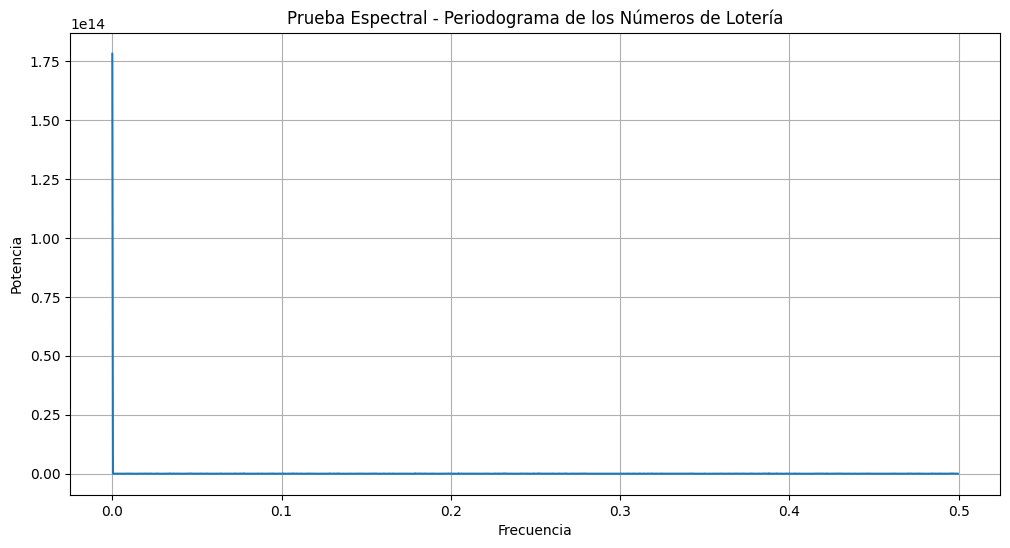

Interpretación de la Prueba Espectral:
 - Si el gráfico es mayormente plano (como ruido blanco), sugiere aleatoriedad.
 - Picos pronunciados en frecuencias específicas pueden indicar patrones o no aleatoriedad.
   (Excluyendo el pico en frecuencia cero, que representa el componente DC o la media de la serie).


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported
print("""
H0 (visual): El espectro de frecuencia es plano, indicando aleatoriedad (ruido blanco).
Ha (visual): El espectro de frecuencia muestra picos significativos, indicando periodicidades.
""")
if 'numeric_value' not in df.columns or df['numeric_value'].empty:
    print("Error: 'numeric_value' column is missing or DataFrame is empty. Cannot perform spectral test.")
elif len(df['numeric_value']) < 2: # FFT usually needs more points to be meaningful
    print("Error: Not enough data points for a meaningful spectral test.")
else:
    series = df['numeric_value'].values
    
    # Perform FFT
    fft_values = np.fft.fft(series)
    
    # Calculate Power Spectral Density (Periodogram)
    # The power is the squared magnitude of the FFT components.
    # We only need the first half of the FFT output due to symmetry for real inputs.
    n = len(series)
    power_spectrum = np.abs(fft_values[:n//2])**2
    
    # Frequencies for x-axis
    # np.fft.fftfreq gives frequencies, we also take the first half
    frequencies = np.fft.fftfreq(n, d=1)[:n//2] # d=1 assumes unit time spacing

    # Plotting the Periodogram
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, power_spectrum)
    plt.title('Prueba Espectral - Periodograma de los Números de Lotería')
    plt.xlabel('Frecuencia')
    plt.ylabel('Potencia')
    plt.grid(True)
    # Add a line for expected mean power under white noise assumption (optional, can be complex to define precisely without normalization)
    # plt.axhline(power_spectrum.mean(), color='r', linestyle='--', label='Potencia Media (aproximada)')
    # plt.legend()
    plt.show()

    print("Interpretación de la Prueba Espectral:")
    print(" - Si el gráfico es mayormente plano (como ruido blanco), sugiere aleatoriedad.")
    print(" - Picos pronunciados en frecuencias específicas pueden indicar patrones o no aleatoriedad.")
    print("   (Excluyendo el pico en frecuencia cero, que representa el componente DC o la media de la serie).")

# Actividad 2

In [20]:


df = pd.read_csv('excelrandom.csv', header=None).astype(float)
df.rename(columns={0: 'numeric_value'}, inplace=True)
print("Sample Data Head:")
print(df.head())
print(f"\nTotal number of observations: {len(df)}")

Sample Data Head:
   numeric_value
0       0.795100
1       0.595015
2       0.508995
3       0.161951
4       0.836194

Total number of observations: 20



--- 1. Hipótesis de la Prueba Kolmogorov-Smirnov ---
H0: Los datos siguen una distribución uniforme U(0,1) (los números son aleatorios y uniformemente distribuidos en el intervalo [0,1]).
H1: Los datos no siguen una distribución uniforme U(0,1).


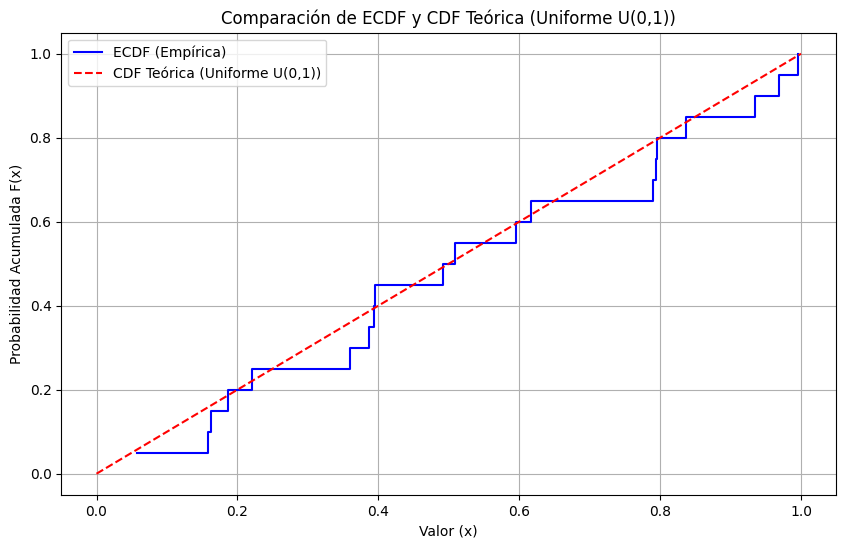


--- 3. Cálculo de Diferencias (D+, D-) ---
D+ (Máxima diferencia positiva [ECDF(x) - CDF_teórica(x)]): 0.0543
D- (Máxima diferencia positiva [CDF_teórica(x) - ECDF(x-1)]): 0.1397

--- 4. Estadístico de Prueba D (calculado manualmente) ---
D = max(D+, D-) = 0.1397

Estadístico de prueba D (obtenido con scipy.stats.kstest vs U(0,1)): 0.1397
P-valor (obtenido con scipy.stats.kstest vs U(0,1)): 0.7803

--- 5. Comparación con Valor Crítico (alpha = 0.05) ---
Valor crítico D_alpha,n (D_0.05,20) obtenido con scipy.stats.ksone.ppf: 0.2647

--- 6. Conclusión ---
Dado que el P-valor (0.7803) es mayor o igual que alpha (0.05), no se rechaza la hipótesis nula (H0).
Esto sugiere que los datos podrían seguir una distribución uniforme U(0,1) (es decir, son consistentes con números aleatorios uniformes).
Comparando con el valor crítico: Estadístico D (0.1397) es menor o igual que el Valor Crítico (0.2647). No se rechaza H0.

Nota: El estadístico D calculado manualmente coincide con el de SciPy.

Anál

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ksone

# --- Simulate having a pandas Series with the information ---
# For demonstration, we'll create a sample Series of 100 random numbers
# These are intended to be from a U(0,1) distribution for this example.

# --- Sort data for ECDF ---
data = np.sort(df['numeric_value'].values)
n = len(data)

# --- 1. Plantear la hipótesis de la prueba Kolmogorov Smirnov ---
print("\n--- 1. Hipótesis de la Prueba Kolmogorov-Smirnov ---")
print("H0: Los datos siguen una distribución uniforme U(0,1) (los números son aleatorios y uniformemente distribuidos en el intervalo [0,1]).")
print("H1: Los datos no siguen una distribución uniforme U(0,1).")

# --- 2. Graficar la función acumulada empírica (ECDF) y teórica (CDF) ---
# ECDF
ecdf = np.arange(1, n + 1) / n

# Theoretical CDF (Uniform distribution U(0,1))
# For a U(0,1) distribution, CDF(x) = x for x in [0,1].
# The 'data' array contains our sorted observed values (x_i).
theoretical_cdf_values_at_data_points = data

plt.figure(figsize=(10, 6))
# Plot ECDF
plt.step(data, ecdf, label='ECDF (Empírica)', where='post', color='blue')
# Plot Theoretical CDF (line from (0,0) to (1,1) for U(0,1))
# We also plot the theoretical CDF values at the data points themselves for clarity if needed,
# but the reference line is most important.
plt.plot([0, 1], [0, 1], label='CDF Teórica (Uniforme U(0,1))', linestyle='--', color='red')

plt.title('Comparación de ECDF y CDF Teórica (Uniforme U(0,1))')
plt.xlabel('Valor (x)')
plt.ylabel('Probabilidad Acumulada F(x)')
plt.legend()
plt.grid(True)
plt.xlim([-0.05, 1.05]) # Assuming data is roughly in [0,1]
plt.ylim([-0.05, 1.05])
# plt.savefig("ecdf_vs_theoretical_cdf_simulated.png") # Save the plot
# print("\nGráfico de ECDF vs CDF Teórica guardado como ecdf_vs_theoretical_cdf_simulated.png")
# Display the plot
plt.show()


# --- 3. Calcular las diferencias entre la distribución empírica y teórica (D+, D-) ---
# F_xi is the theoretical CDF value at data[i]. For U(0,1), F_xi = data[i]
F_xi = data # Theoretical CDF values for U(0,1) at our sorted data points

# D+ = max_i ( i/n - F(x_i) )  where x_i is the i-th smallest observation (1-indexed i)
d_plus_values = (np.arange(1, n + 1) / n) - F_xi
d_plus = np.max(d_plus_values)

# D- = max_i ( F(x_i) - (i-1)/n ) where x_i is the i-th smallest observation (1-indexed i)
d_minus_values = F_xi - (np.arange(0, n) / n)
d_minus = np.max(d_minus_values)

print(f"\n--- 3. Cálculo de Diferencias (D+, D-) ---")
print(f"D+ (Máxima diferencia positiva [ECDF(x) - CDF_teórica(x)]): {d_plus:.4f}")
print(f"D- (Máxima diferencia positiva [CDF_teórica(x) - ECDF(x-1)]): {d_minus:.4f}")


# --- 4. Calcular el estadístico de prueba ---
# D = max(D+, D-)
ks_statistic_manual = np.max([d_plus, d_minus])
print(f"\n--- 4. Estadístico de Prueba D (calculado manualmente) ---")
print(f"D = max(D+, D-) = {ks_statistic_manual:.4f}")

# Using scipy.stats.kstest to verify and get p-value
# Test against a uniform distribution U(0,1)
# The 'uniform' string implies U(0,1) by default with kstest if args are not given,
# or more explicitly with args=(0,1)
ks_statistic_scipy, p_value_scipy = kstest(rvs=data, cdf='uniform', args=(0, 1))

print(f"\nEstadístico de prueba D (obtenido con scipy.stats.kstest vs U(0,1)): {ks_statistic_scipy:.4f}")
print(f"P-valor (obtenido con scipy.stats.kstest vs U(0,1)): {p_value_scipy:.4f}")


# --- 5. Comparar con el valor crítico del estadístico ---
alpha = 0.05 # Significance level
print(f"\n--- 5. Comparación con Valor Crítico (alpha = {alpha}) ---")

# Critical value for KS test.
# Using scipy.stats.ksone.ppf(1-alpha, n) for a two-sided test.
# This gives the critical value for D_n.
try:
    critical_value_scipy = ksone.ppf(1 - alpha, n)
    print(f"Valor crítico D_alpha,n (D_{alpha},{n}) obtenido con scipy.stats.ksone.ppf: {critical_value_scipy:.4f}")
except AttributeError:
    # Fallback for older scipy or if ksone is not found
    # For alpha = 0.05, C_alpha is approximately 1.36 for large n.
    # D_alpha,n approx C_alpha / sqrt(n)
    C_alpha_005 = 1.35810
    critical_value_approx = C_alpha_005 / np.sqrt(n)
    print(f"scipy.stats.ksone.ppf no disponible. Usando aproximación C_alpha/sqrt(n).")
    print(f"Valor crítico aproximado D_alpha,n (D_{alpha},{n}): {critical_value_approx:.4f}")
    critical_value_scipy = critical_value_approx
except Exception as e:
    critical_value_scipy = None # Unable to calculate
    print(f"No se pudo calcular el valor crítico: {e}")


# --- 6. Concluir ---
print("\n--- 6. Conclusión ---")

# Conclusion using p-value (primary method)
if p_value_scipy < alpha:
    conclusion_p_value = (f"Dado que el P-valor ({p_value_scipy:.4f}) es menor que alpha ({alpha}), "
                          "se rechaza la hipótesis nula (H0).")
    conclusion_p_value += "\nEsto sugiere que los datos NO siguen una distribución uniforme U(0,1)."
else:
    conclusion_p_value = (f"Dado que el P-valor ({p_value_scipy:.4f}) es mayor o igual que alpha ({alpha}), "
                          "no se rechaza la hipótesis nula (H0).")
    conclusion_p_value += "\nEsto sugiere que los datos podrían seguir una distribución uniforme U(0,1) (es decir, son consistentes con números aleatorios uniformes)."
print(conclusion_p_value)

# Conclusion using critical value (secondary, if available and calculated)
if critical_value_scipy is not None:
    if ks_statistic_scipy > critical_value_scipy:
        conclusion_critical = (f"Comparando con el valor crítico: Estadístico D ({ks_statistic_scipy:.4f}) "
                               f"es mayor que el Valor Crítico ({critical_value_scipy:.4f}). Se rechaza H0.")
    else:
        conclusion_critical = (f"Comparando con el valor crítico: Estadístico D ({ks_statistic_scipy:.4f}) "
                               f"es menor o igual que el Valor Crítico ({critical_value_scipy:.4f}). No se rechaza H0.")
    print(conclusion_critical)
else:
    print("No se pudo realizar la comparación directa con el valor crítico porque no fue calculado.")

# Check consistency between manual D and SciPy's D
if np.isclose(ks_statistic_manual, ks_statistic_scipy):
    print("\nNota: El estadístico D calculado manualmente coincide con el de SciPy.")
else:
    print(f"\nNota: El estadístico D calculado manualmente ({ks_statistic_manual:.4f}) "
          f"difiere ligeramente del de SciPy ({ks_statistic_scipy:.4f}). "
          "Esto puede deberse a detalles de implementación o precisión numérica. "
          "El valor de SciPy es generalmente preferido para la conclusión formal.")

print("\nAnálisis de aleatoriedad (uniformidad) con Kolmogorov-Smirnov completado usando datos simulados.")